In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

## Importing data

In [2]:
df = pd.read_csv("../data/preprocessed_cleaned_body.csv")

In [3]:
df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...


## Converting bias to categorical (binary)

In [4]:
right = df.loc[df['Bias'] > 0]
left = df.loc[df['Bias'] <= 0]

# 1 = Right bias, 0 = Left bias
right['Bias'] = 1
left['Bias'] = 0

cat_df = pd.concat([right, left])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
cat_df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,1,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,1,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,1,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,1,newlyreleased body camera footage reveals dram...


In [6]:
cat_df['Bias'].value_counts()

0    1129
1     546
Name: Bias, dtype: int64

## Preparing training and testing data

In [7]:
X = cat_df.iloc[:, cat_df.columns != 'Bias']
y = cat_df['Bias']

In [8]:
X.head()

,Body,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,newlyreleased body camera footage reveals dram...


In [9]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())

In [10]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [11]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,would,wrong,wrote,year,yearold,yet,york,you,young,zealand
0,0.0,0.0,0.52381,0.0,0.2,0.0,0.0,0.0,0.142857,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.130435,0.000000,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,...,0.000000,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.025641,0.4,0.0,0.000000,0.066667,0.111111,0.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 1. Gaussian Naive Bayes

In [13]:
# Defining Model
gnb = GaussianNB()
# Training Model
gnb.fit(X_train, y_train)
# Making Predictions
y_pred = gnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.5083532219570406


In [14]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.5833199679230152


## 2. Multinomial Naive Bayes (Binary)

In [15]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7088305489260143


In [16]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.6944667201283079


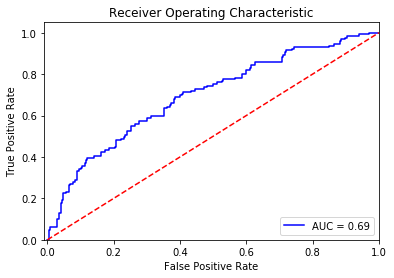

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       290
           1       0.63      0.13      0.22       129

    accuracy                           0.71       419
   macro avg       0.67      0.55      0.52       419
weighted avg       0.69      0.71      0.64       419



In [19]:
print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.21794871794871795


## Trying baseline models

In [20]:
y_pred = [1] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.30787589498806683


In [21]:
y_pred = [0] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.6921241050119332


## Trying multiclass-classification (5 classes)

In [22]:
df['Bias'].describe()

count    1675.000000
mean       -1.974072
std        13.990288
min       -38.250000
25%       -10.000000
50%        -2.000000
75%         3.000000
max        40.000000
Name: Bias, dtype: float64

(array([ 22.,  99., 168., 253., 643., 172.,  95., 134.,  72.,  17.]),
 array([-38.25 , -30.425, -22.6  , -14.775,  -6.95 ,   0.875,   8.7  ,
         16.525,  24.35 ,  32.175,  40.   ]),
 <a list of 10 Patch objects>)

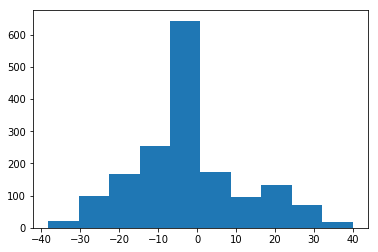

In [23]:
plt.hist(df['Bias'])

In [24]:
# 0 represents most left, 1 represents most right
bins = [-41, -10, -2, 2, 10, 41]
names = ['0', '0.25', '0.5', '0.75', '1']

multi_df = df.loc[:]
multi_df['Category'] = pd.cut(multi_df['Bias'], bins, labels=names)

In [25]:
multi_df.head()

,Body,Bias,cleaned_body,Category
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...,0.5
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...,0.5
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...,0.25
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...,0.25
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...,0


In [26]:
multi_df['Category'].value_counts()

0       430
0.25    420
0.5     386
1       299
0.75    140
Name: Category, dtype: int64

## Preparing training and testing data

In [27]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(multi_df['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())
y = multi_df['Category']

In [28]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Using Multinomial Naive Bayes

In [30]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.43675417661097854


In [31]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.44      0.59      0.50       112
        0.25       0.38      0.44      0.41       105
         0.5       0.49      0.52      0.50        97
        0.75       1.00      0.06      0.11        33
           1       0.44      0.26      0.33        72

    accuracy                           0.44       419
   macro avg       0.55      0.37      0.37       419
weighted avg       0.48      0.44      0.42       419



In [32]:
y_probs = mnb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.6677620047452753


In [33]:
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

F1 score:  0.43675417661097854


## Trying multiclass-classification (3 classes)

In [34]:
# 1 represents most left, 3 represents most right
bins = [-41, -5, 5, 41]
names = ['1', '2', '3']

multi_df2 = df.loc[:]
multi_df2['Category'] = pd.cut(multi_df2['Bias'], bins, labels=names)

In [35]:
multi_df2['Category'].value_counts()

2    668
1    637
3    370
Name: Category, dtype: int64

## Preparing training and testing data

In [36]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(multi_df2['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())
y = multi_df2['Category']

In [37]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Using Multinomial Naive Bayes

In [39]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.5751789976133651


In [40]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           1       0.54      0.62      0.58       162
           2       0.62      0.73      0.67       165
           3       0.54      0.23      0.32        92

    accuracy                           0.58       419
   macro avg       0.56      0.52      0.52       419
weighted avg       0.57      0.58      0.56       419



In [41]:
y_probs = mnb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.7511944457999208


In [42]:
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

F1 score:  0.5751789976133651


## Baseline models

In [43]:
y_pred = [1] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test.astype('float64').replace(2, 3), y_pred))

Accuracy Score:  0.38663484486873506


In [44]:
y_pred = [2] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test.astype('float64').replace(1, 3), y_pred))

Accuracy Score:  0.3937947494033413


In [45]:
y_pred = [3] * y_test.shape[0]
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test.astype('float64').replace(2, 1), y_pred))

Accuracy Score:  0.21957040572792363


## Using TFIDF

## Binary Classification

In [46]:
X = cat_df.iloc[:, cat_df.columns != 'Bias']
y = cat_df['Bias']

In [47]:
X.head()

,Body,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,newlyreleased body camera footage reveals dram...


In [48]:
tfidf_transformer = TfidfVectorizer(max_features=800)
tfidf = tfidf_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

In [49]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7016706443914081


In [52]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.7234963913392142


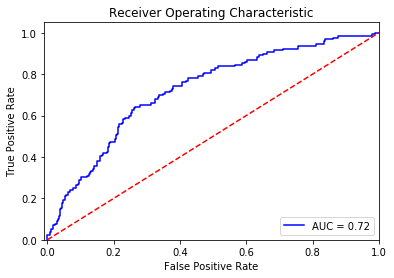

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       290
           1       0.53      0.30      0.38       129

    accuracy                           0.70       419
   macro avg       0.63      0.59      0.59       419
weighted avg       0.67      0.70      0.67       419



In [55]:
print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.3842364532019704


## Multiclass-classification (3 classes)

In [56]:
tfidf_transformer = TfidfVectorizer(max_features = 800)
tfidf = tfidf_transformer.fit_transform(multi_df2['cleaned_body'])

X = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names())
y = multi_df2['Category']

In [57]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.6133651551312649


In [60]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           1       0.58      0.62      0.60       162
           2       0.67      0.69      0.68       165
           3       0.57      0.47      0.51        92

    accuracy                           0.61       419
   macro avg       0.60      0.59      0.60       419
weighted avg       0.61      0.61      0.61       419



In [61]:
y_probs = mnb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.7867350368960674


In [62]:
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

F1 score:  0.6133651551312649


## Multiclass-classification (5 classes)

In [63]:
# 0 represents most left, 1 represents most right
bins = [-41, -10, -2, 2, 10, 41]
names = ['0', '0.25', '0.5', '0.75', '1']

multi_df = df.loc[:]
multi_df['Category'] = pd.cut(multi_df['Bias'], bins, labels=names)

In [64]:
tfidf_transformer = TfidfVectorizer(max_features = 800)
tfidf = tfidf_transformer.fit_transform(multi_df['cleaned_body'])

X = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names())
y = multi_df['Category']

In [65]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
# Defining Model
mnb = MultinomialNB()
# Training Model
mnb.fit(X_train, y_train)
# Making Predictions
y_pred = mnb.predict(X_test)
# Evaluating
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.48687350835322196


In [68]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       112
        0.25       0.40      0.41      0.40       105
         0.5       0.54      0.63      0.58        97
        0.75       0.50      0.03      0.06        33
           1       0.46      0.47      0.47        72

    accuracy                           0.49       419
   macro avg       0.49      0.42      0.41       419
weighted avg       0.49      0.49      0.47       419



In [69]:
y_probs = mnb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, average="macro", multi_class="ovo")
print('ROC Score is: ', roc_auc)

ROC Score is:  0.710649350538664


# Findings:

1. TFIDF outperforms BoW for all types of Naive Bayes classification
    - Binary classification: 
        - Accuracy: 0.70
        - ROC: 0.72
        - F1 score: 0.38
    - Multi-class classification (3 classes):
        - Accuracy: 0.61
        - ROC: 0.79
    - Multi-class classification (5 classes):
        - Accuracy: 0.49
        - ROC: 0.71
2. Scaling performs better than non-scaling
3. Best results are obtained with TFIDF max_features around 800
4. Best classification results are obtained with 3 classes/2 classes